# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Tubagus Naufal Fathurahman
- **Email:** naufthy.fha@gmail.com
- **ID Dicoding:** tubagusnaufalf

## Menentukan Pertanyaan Bisnis

- Bagaimana tren untuk polutan PM2.5? Pada bulan apa saja biasanya terjadi puncak polusi dan penurunan polusi paling signifikan?

- Jika kualitas udara dikategorikan menjadi 'Baik', 'Sedang', dan 'Tidak Sehat' berdasarkan level PM10, stasiun mana yang memiliki jumlah hari dengan kategori 'Tidak Sehat' paling banyak?

## Import Semua Packages/Library yang Digunakan

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
pd.set_option("display.colheader_justify", "left")

## Data Wrangling

### Gathering Data

In [13]:
path = "C:/Users/Naufthy/Downloads/1_Dicoding/02_Latihan/01_Data Science/04_Belajar Analisis dengan Python/submission/data"

aotingzhongxin_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Aotizhongxin_20130301-20170228.csv'))
changping_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Changping_20130301-20170228.csv'))
dingling_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Dingling_20130301-20170228.csv'))
dongsi_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Dongsi_20130301-20170228.csv'))
guanyuan_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Guanyuan_20130301-20170228.csv'))
gucheng_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Gucheng_20130301-20170228.csv'))
huairou_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Huairou_20130301-20170228.csv'))
nongzhanguan_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Nongzhanguan_20130301-20170228.csv'))
shunyi_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Shunyi_20130301-20170228.csv'))
tiantan_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Tiantan_20130301-20170228.csv'))
wanliu_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Wanliu_20130301-20170228.csv'))
wanshouxigong_df = pd.read_csv(os.path.join(path, 'PRSA_Data_Wanshouxigong_20130301-20170228.csv'))

In [14]:
df_list = [aotingzhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df,
           gucheng_df,huairou_df, nongzhanguan_df, shunyi_df, tiantan_df,
           wanliu_df, wanshouxigong_df]

for df in df_list:
  print(df['station'].unique())
  print(df.head(), '\n')

['Aotizhongxin']
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2   CO     O3    TEMP  PRES    DEWP  RAIN wd    WSPM station      
0  1   2013  3      1    0     4.0    4.0    4.0   7.0  300.0  77.0 -0.7   1023.0 -18.8  0.0   NNW  4.4   Aotizhongxin
1  2   2013  3      1    1     8.0    8.0    4.0   7.0  300.0  77.0 -1.1   1023.2 -18.2  0.0     N  4.7   Aotizhongxin
2  3   2013  3      1    2     7.0    7.0    5.0  10.0  300.0  73.0 -1.1   1023.5 -18.2  0.0   NNW  5.6   Aotizhongxin
3  4   2013  3      1    3     6.0    6.0   11.0  11.0  300.0  72.0 -1.4   1024.5 -19.4  0.0    NW  3.1   Aotizhongxin
4  5   2013  3      1    4     3.0    3.0   12.0  12.0  300.0  72.0 -2.0   1025.2 -19.5  0.0     N  2.0   Aotizhongxin 

['Changping']
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2   CO     O3    TEMP  PRES    DEWP  RAIN wd    WSPM station   
0  1   2013  3      1    0     3.0    6.0   13.0   7.0  300.0  85.0 -2.3   1020.8 -19.7  0.0     E  0.5   Changping
1  2   2013  3      1

**Insight:**
- Perlu dibuat kolom date-time (karena ini time series)
- fitur 'NO' bisa di drop

### Assessing Data

In [15]:
def assess_df(df):
  print("\nInfo\n")
  print(df.info())
  print("\nMissing Values\n")
  print(df.isna().sum())
  print("\nDuplicated\n")
  print(df.duplicated().sum())
  print("\nDescribe\n")
  print(df.describe(include='all').transpose())

#### Aotingzhongxin, Changping, Dingling, Dongsi

In [16]:
assess_df(aotingzhongxin_df)
assess_df(changping_df)
assess_df(dingling_df)
assess_df(dongsi_df)


Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Missing Values

No            0
year          0
month  

#### Guanyuan, Gucheng, Huairou, Nongzhanguan

In [17]:
assess_df(guanyuan_df)
assess_df(gucheng_df)
assess_df(huairou_df)
assess_df(nongzhanguan_df)


Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Missing Values

No            0
year          0
month  

#### Shunyi, Tiantan, Wanliu, Wanshouxigong

In [18]:
assess_df(shunyi_df)
assess_df(tiantan_df)
assess_df(wanliu_df)
assess_df(wanshouxigong_df)


Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Missing Values

No            0
year          0
month  

____

**Insight:**
- Perlu mengubah data tanggal menjadi datetime
- masih banyak missing values
- PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, dan WSPM adalah data numerik. wd dan station adalah categorical
- PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM tidak mungkin negatif

In [19]:
num_features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
cat_features = ['wd', 'station']

### Cleaning Data

#### Pembersihan nilai negatif pada features non negatif

In [20]:
for df in df_list:
  for feat in num_features:
    if feat in ['TEMP', 'PRES', 'DEWP']:
      continue

    df[feat] = df[feat].mask(df[feat] < 0, np.nan)

In [21]:
for df in df_list:
  assess_df(df[num_features])


Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   34139 non-null  float64
 1   PM10    34346 non-null  float64
 2   SO2     34129 non-null  float64
 3   NO2     34041 non-null  float64
 4   CO      33288 non-null  float64
 5   O3      33345 non-null  float64
 6   TEMP    35044 non-null  float64
 7   PRES    35044 non-null  float64
 8   DEWP    35044 non-null  float64
 9   RAIN    35044 non-null  float64
 10  WSPM    35050 non-null  float64
dtypes: float64(11)
memory usage: 2.9 MB
None

Missing Values

PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
WSPM       14
dtype: int64

Duplicated

0

Describe

       count    mean         std          min       25%     50%     75%     max    
PM2.5  34139.0    82.773611    82.135694    3.0000    22.0    5

In [22]:
for df in df_list:
  df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
  df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#### Impute missing data

In [ ]:
for df in df_list:
  df.drop(labels=['No'], axis=1, inplace=True)
  df[num_features] = df[num_features].interpolate(method='linear')
  df[cat_features] = df[cat_features].ffill().bfill()
  assess_df(df)


Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   PM2.5     35064 non-null  float64       
 1   PM10      35064 non-null  float64       
 2   SO2       35064 non-null  float64       
 3   NO2       35064 non-null  float64       
 4   CO        35064 non-null  float64       
 5   O3        35064 non-null  float64       
 6   TEMP      35064 non-null  float64       
 7   PRES      35064 non-null  float64       
 8   DEWP      35064 non-null  float64       
 9   RAIN      35064 non-null  float64       
 10  wd        35064 non-null  object        
 11  WSPM      35064 non-null  float64       
 12  station   35064 non-null  object        
 13  datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 3.7+ MB
None

Missing Values

PM2.5       0
PM10        0
SO2         0
NO2         

**Insight:**
- fitur No sudah didrop
- Sudah tidak ada missing values
- Jumlah data sudah sama

## Exploratory Data Analysis (EDA)

In [24]:
all_df = pd.concat(df_list)
all_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


### Explore PM2.5

In [25]:
monthly_pm25_df = all_df.groupby(by=all_df['datetime'].dt.month)['PM2.5'].mean()

In [26]:
print(monthly_pm25_df)

datetime
1      93.760559
2      89.213391
3      94.594295
4      73.367153
5      63.541148
6      68.837547
7      71.401115
8      53.465479
9      61.281071
10     91.715859
11     93.323963
12    103.679184
Name: PM2.5, dtype: float64


### Explore PM10

In [27]:
kategori_bins = [0, 50, 150, float('inf')]
kategori_labels = ['Baik', 'Sedang', 'Tidak Sehat']
all_df['pm10_category'] = pd.cut(all_df['PM10'], bins=kategori_bins, labels=kategori_labels, right=True)

unhealthy_days = all_df[all_df['pm10_category'] =='Tidak Sehat']

station_ranking = unhealthy_days['station'].value_counts().sort_values()

station_ranking

station
Dingling          5708
Changping         6742
Huairou           6850
Shunyi            7619
Tiantan           8062
Nongzhanguan      8641
Guanyuan          8649
Dongsi            8751
Wanliu            9036
Wanshouxigong     9103
Aotizhongxin      9125
Gucheng          10610
Name: count, dtype: int64

**Insight:**
- PM2.5 pada bulan Desember adalah tertinggi dengan rerata 103.679184 sementara bulan Agustus adalah terendah dengan rerata 53.465479
- Stasiun yang memiliki jumlah hari 'Tidak Sehat' terbanyak adalah Gucheng dengan 10610 hari sementara paling sedikit adalah Dingling dengan 5708 hari

## Visualization & Explanatory Analysis

### Bagaimana tren untuk polutan PM2.5? Pada bulan apa saja biasanya terjadi puncak polusi dan penurunan polusi paling signifikan?

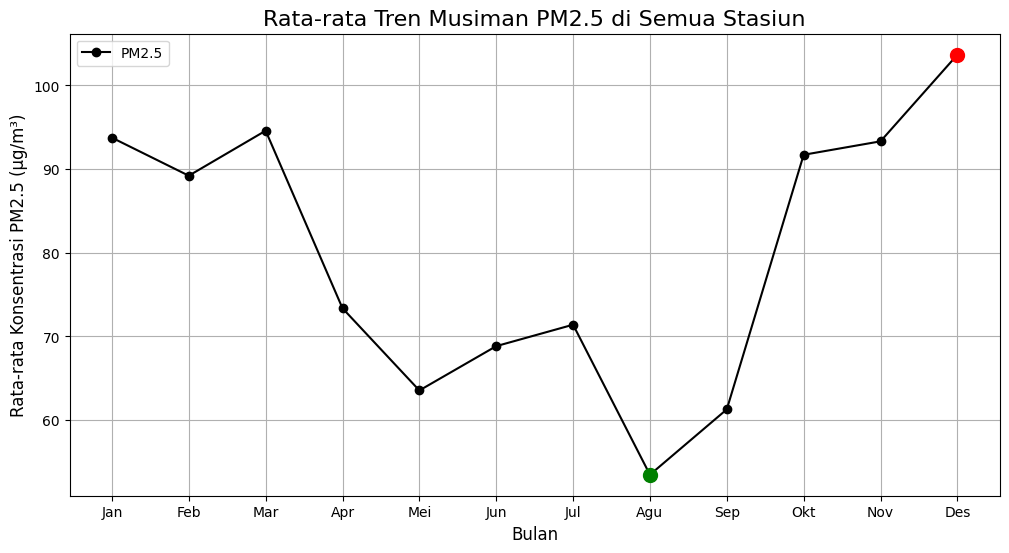

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_pm25_df.index, monthly_pm25_df.values, marker='o', color='black', label="PM2.5")

# Menandai titik terendah (Agustus) dan tertinggi (Desember)
plt.plot(8, monthly_pm25_df.loc[8], marker='o', markersize=10, color='green')
plt.plot(12, monthly_pm25_df.loc[12], marker='o', markersize=10, color='red')

plt.title('Rata-rata Tren Musiman PM2.5 di Semua Stasiun', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.legend()
plt.show()

### Jika kualitas udara dikategorikan menjadi 'Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', dan 'Berbahaya' berdasarkan level PM10, stasiun mana yang memiliki jumlah hari dengan kategori 'Tidak Sehat' paling banyak?

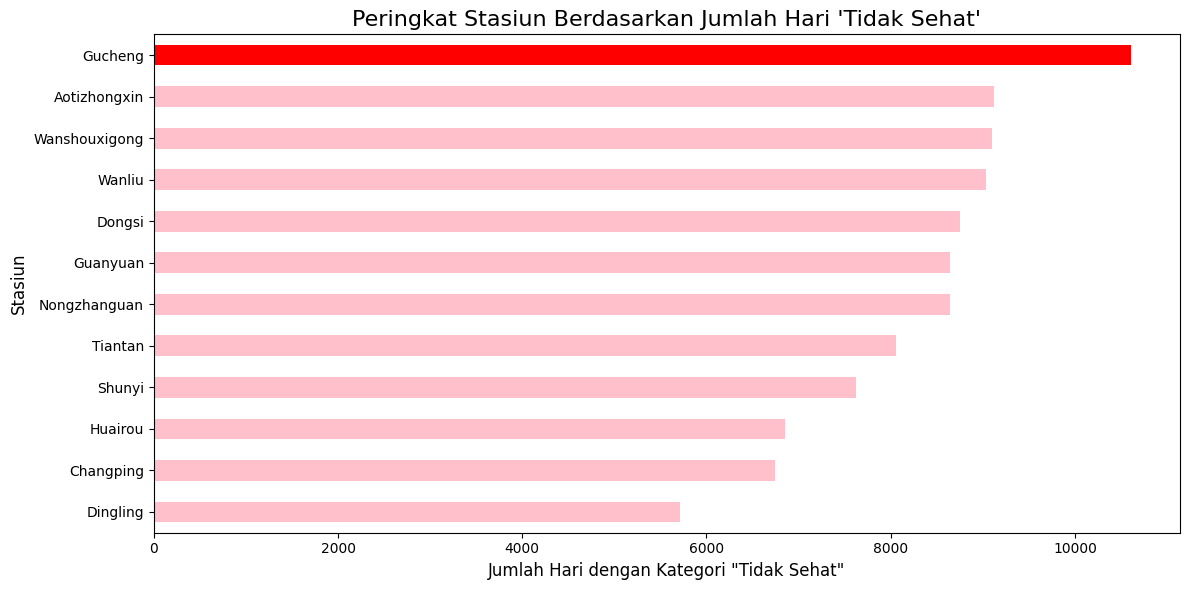

In [36]:
plt.figure(figsize=(12, 6))
colors = ['pink'] * len(station_ranking)
colors[-1] = 'red'
station_ranking.plot(kind='barh', color=colors)
plt.title("Peringkat Stasiun Berdasarkan Jumlah Hari 'Tidak Sehat'", fontsize=16)
plt.ylabel('Stasiun', fontsize=12)
plt.xlabel('Jumlah Hari dengan Kategori "Tidak Sehat"', fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- Polusi PM2.5 paling rendah pada bulan Agustus dan paling tinggi pada bulan Desember
- Gucheng memiliki jumlah hari 'Tidak Sehat' paling tinggi sementara Dingling paling rendah

## Conclusion

- Polusi PM2.5 paling rendah pada bulan Agustus dan paling tinggi pada bulan Desember
- Gucheng memiliki jumlah hari 'Tidak Sehat' paling tinggi sementara Dingling paling rendah

In [34]:
all_df.to_csv("dashboard/main_data.csv", index=False)